In [1]:
#Loading packages
%matplotlib inline 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score 
import datetime as dt
from scipy import stats as sts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import math
import seaborn as sns


In [65]:
GSE=pd.read_csv("GSE58606_data.csv")
GSE.head(5)

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual
0,6.877643,8.080215,6.245265,6.304782,6.686064,7.805950,6.814781,7.146955,6.170680,6.129586,...,7.176684,7.724408,6.035476,6.255048,6.572019,6.251777,5.873303,6.362097,1,primary breast cancer
1,6.544287,6.882722,5.874236,6.324987,6.638048,6.946567,6.488574,6.690773,6.160272,6.104929,...,7.249094,7.308890,6.021796,6.902473,6.347183,6.625569,6.004899,6.560329,1,primary breast cancer
2,6.879713,6.885387,5.958748,6.317687,6.664956,7.266728,6.965078,6.969818,6.226957,6.124874,...,7.404104,7.466418,5.977962,6.484571,6.259788,6.226957,5.815442,6.354622,1,primary breast cancer
3,6.943464,7.972342,6.026106,6.425266,6.761433,8.010618,6.441945,6.679714,6.471518,6.264685,...,6.811846,8.601204,6.021790,5.912640,6.002302,5.999349,5.811117,6.306704,1,primary breast cancer
4,7.097877,9.014977,7.127656,6.566482,6.990273,8.746360,8.087122,7.680249,6.499892,6.226560,...,6.361862,7.570751,5.967819,5.821186,6.550078,5.947994,5.828413,6.288596,1,primary breast cancer


In [2]:
#loading accepted da
data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSLMCETGXVHEisEi-Gk0aEgghySGaK-c127tgfCOc-hzjetTp__XSjZxaU_eMsV0RziuLVXZ6ebLYwy/pub?output=csv",low_memory=False,index_col=0)

In [3]:
#checking first few columns of accpted Malignant
data.head(5).head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.1000,263.499,1
107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.8900,209.190,2
12,25,22.860000,82,4.090,0.827271,20.4500,23.670000,5.1400,313.730,1
72,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.2100,513.660,2
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.0913,318.302,1


In [4]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.269000,27.675695,98.230000,10.253753,2.799148,27.23392,10.146165,15.219034,536.596902,1.552000
std,15.999407,4.976360,23.216539,10.346829,3.854780,19.67296,6.741812,13.009221,345.756215,0.497338
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.31100,1.656020,3.210000,45.843000,1.000000
25%,45.000000,23.010000,86.000000,4.376000,0.960273,12.33100,5.478170,6.892350,270.142000,1.000000
50%,55.000000,27.688778,93.000000,6.042000,1.402626,21.21170,8.300955,10.960000,468.786000,2.000000
75%,71.000000,31.250000,102.000000,11.910000,2.871792,38.80660,11.900000,19.463240,703.973000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.28000,38.040000,82.100000,1698.440000,2.000000


In [5]:
#checking column names
from IPython.display import display_html
display(data.info())
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 37 to 19
Data columns (total 10 columns):
Age               5000 non-null int64
BMI               5000 non-null float64
Glucose           5000 non-null int64
Insulin           5000 non-null float64
HOMA              5000 non-null float64
Leptin            5000 non-null float64
Adiponectin       5000 non-null float64
Resistin          5000 non-null float64
MCP.1             5000 non-null float64
Classification    5000 non-null int64
dtypes: float64(7), int64(3)
memory usage: 429.7 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 37 to 19
Data columns (total 10 columns):
Age               5000 non-null int64
BMI               5000 non-null float64
Glucose           5000 non-null int64
Insulin           5000 non-null float64
HOMA              5000 non-null float64
Leptin            5000 non-null float64
Adiponectin       5000 non-null float64
Resistin          5000 non-null float64
MCP.1             5000 non-null float64
Classification    5000 non-null int64
dtypes: float64(7), int64(3)
memory usage: 429.7 KB


None

In [6]:
#checking missing values 
data.isnull()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
37,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False
72,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53,False,False,False,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False


In [7]:
#checking sum of data per column 
data.count().tail()

Leptin            5000
Adiponectin       5000
Resistin          5000
MCP.1             5000
Classification    5000
dtype: int64

In [8]:
#checking percentage of missing data 
data_missing=data.isna()
data_num_missing = data_missing.sum()
data_num_missing*100/len(data)

Age               0.0
BMI               0.0
Glucose           0.0
Insulin           0.0
HOMA              0.0
Leptin            0.0
Adiponectin       0.0
Resistin          0.0
MCP.1             0.0
Classification    0.0
dtype: float64

In [9]:
#coping data before wrangling to maintain original set incase we want to go back
import copy
data_1=copy.deepcopy(data)

In [10]:
#dropping NA
data.dropna(inplace=True)

In [11]:
#checking shape
data.shape

(5000, 10)

In [12]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.269000,27.675695,98.230000,10.253753,2.799148,27.23392,10.146165,15.219034,536.596902,1.552000
std,15.999407,4.976360,23.216539,10.346829,3.854780,19.67296,6.741812,13.009221,345.756215,0.497338
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.31100,1.656020,3.210000,45.843000,1.000000
25%,45.000000,23.010000,86.000000,4.376000,0.960273,12.33100,5.478170,6.892350,270.142000,1.000000
50%,55.000000,27.688778,93.000000,6.042000,1.402626,21.21170,8.300955,10.960000,468.786000,2.000000
75%,71.000000,31.250000,102.000000,11.910000,2.871792,38.80660,11.900000,19.463240,703.973000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.28000,38.040000,82.100000,1698.440000,2.000000


In [13]:
data.groupby("Classification").count()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
1,2240,2240,2240,2240,2240,2240,2240,2240,2240
2,2760,2760,2760,2760,2760,2760,2760,2760,2760


Feature selection

In [14]:
#Checking variable corrolations 
from numpy import corrcoef
cor= data.corr()
correlations = cor["Classification"].sort_values(ascending=False)

In [15]:
corr_many= correlations[correlations >0.5]
corr_many

Classification    1.0
Name: Classification, dtype: float64

In [16]:
corr_less= correlations[(correlations >0.10) & (correlations < 0.11)]
print(corr_less)

Series([], Name: Classification, dtype: float64)


<Figure size 720x720 with 0 Axes>

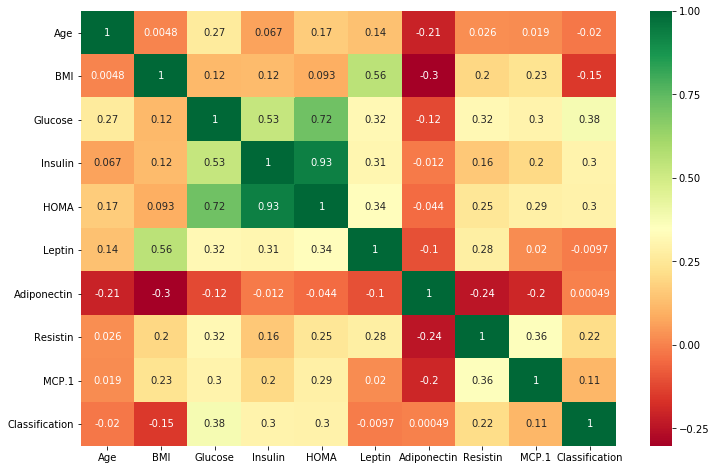

In [17]:

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
f,ax= plt.subplots(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

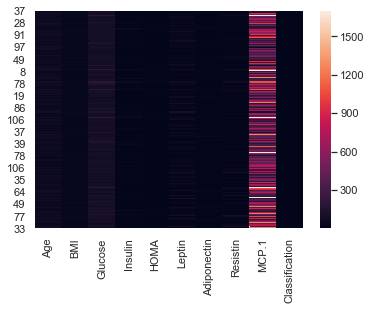

In [18]:
sns.set()
ax = sns.heatmap(data)

In [19]:
#the X variable will take everything expect theClassification, as x is the input and is supposed to match to the correct label
X =data.drop(columns = ["Classification"])
y = data['Classification']

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
feature =X
target=y

In [22]:
model = ExtraTreesClassifier()
model.fit(feature,target)
print(model.feature_importances_)

[0.14935044 0.10922618 0.1513462  0.10207029 0.10755489 0.09308647
 0.08277041 0.1289186  0.07567652]


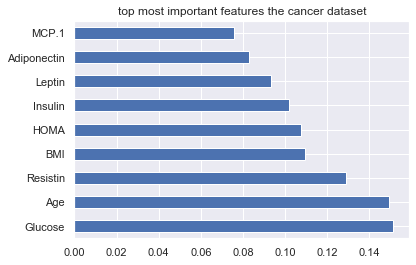

In [23]:
feat_importances = pd.Series(model.feature_importances_, index=feature.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top most important features the cancer dataset")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import time
import matplotlib.pyplot as plt
import seaborn as sns

Average accuracy of holdout approach:  1.0
Mean Time taken by holdout approach:  0.2581503391265869
-------------------


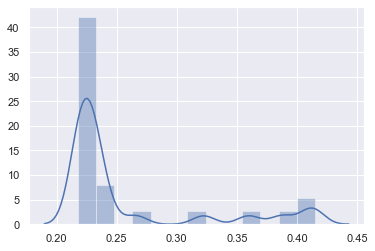

In [25]:
#Random forest using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=30,stratify=y)
randomforest_split = RandomForestClassifier()

time_holdout = []
score = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_holdout = time.time()
  #trains the random forest using cross validation
  randomforest_split.fit(X = X_train, y = y_train)
  score.append(randomforest_split.score(X_test, y_test))
  
  end_holdout = time.time()
  time_holdout.append(end_holdout - start_holdout)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_holdout))
print('-------------------')
sns.distplot(time_holdout)
plt.show()

Average accuracy of cross validation approach:  1.0
Mean Time taken by cross validation approach:  2.2264266872406004
-------------------


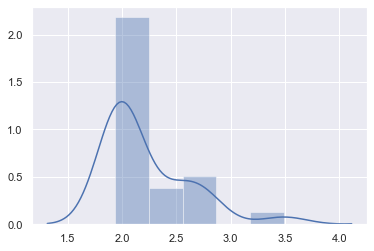

In [26]:
from sklearn.metrics import average_precision_score
randomforest = RandomForestClassifier()

time_cv = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_cv = time.time()
  #trains the random forest using cross validation
  cv_score = cross_val_score(randomforest, X, y, cv=8)
  end_cv = time.time()
  time_cv.append(end_cv - start_cv)

print("Average accuracy of cross validation approach: ",np.mean(cv_score))
print('Mean Time taken by cross validation approach: ' ,np.mean(time_cv))
print('-------------------')
sns.distplot(time_cv)
plt.show()

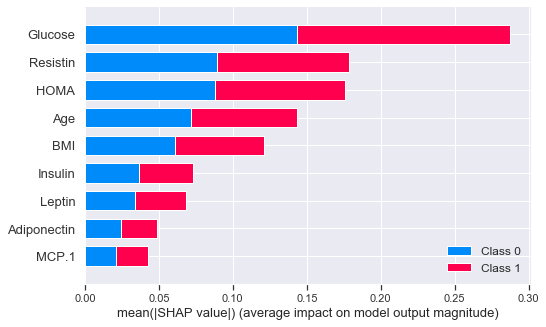

In [27]:
import shap
randomforest.fit(X = X_train, y = y_train)
explainer = shap.TreeExplainer(randomforest)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

Average accuracy of holdout approach:  0.626
Mean Time taken by holdout approach:  0.00285858154296875
-------------------


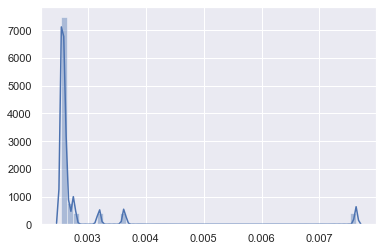

In [29]:
#applying the Naive bayes classification model
gnb = GaussianNB()
time_cv = []
score = []
for i in range(25):
  # calculating time taken for model to run
  start_cv = time.time()
  #training random forest using cross validation
  gnb.fit(X = X_train, y = y_train)
  score.append(gnb.score(X_test, y_test))
  #cv_score = cross_val_score(randomforest_split, X, y, cv=8)
  end_cv = time.time()
  time_cv.append(end_cv - start_cv)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_cv))
print('-------------------')
sns.distplot(time_cv)
plt.show()

In [30]:
preds =gnb.fit(X_train,y_train).predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("The accuracy of the model is %.3f" %accuracy_score(y_test, preds)) 
print("The recall of the model  is %.3f" % recall_score(y_test, preds))
print("The precision of the model is  is %.3f" % precision_score(y_test, preds))

The accuracy of the model is 0.626
The recall of the model  is 0.842
The precision of the model is  is 0.554


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, roc_auc_score
logRegr = LogisticRegression(max_iter=10000)
logRegr.fit(X_train, y_train)

#  predictions using test set
preds = logRegr.predict(X_test)

In [35]:
#Evaluating performance
print("The accuracy of the model is %.3f" %accuracy_score(y_test, preds)) 
print("The recall of the model  is %.3f" % recall_score(y_test, preds))
print("The precision of the model is  is %.3f" % precision_score(y_test, preds))

The accuracy of the model is 0.777
The recall of the model  is 0.757
The precision of the model is  is 0.749


In [36]:
# no skill prediction probability
probs = [0 for _ in range(len(y_test))]

In [37]:
# probabilities for positive outcomes
reg_probs = logRegr.predict_proba(X_test)[:, 1]

In [38]:
#Model and Training support vector machine
from sklearn import svm
clf = svm.SVC()
preds=clf.fit(X_train,y_train).predict(X_test)

print("SVM score:", clf.score(X_test,y_test))

SVM score: 0.7533333333333333


In [39]:
#Evaluating performance
print("The accuracy of the model is %.3f" %accuracy_score(y_test, preds)) 
print("The recall of the model  is %.3f" % recall_score(y_test, preds))
print("The precision of the model is  is %.3f" % precision_score(y_test, preds))

The accuracy of the model is 0.753
The recall of the model  is 0.860
The precision of the model is  is 0.677


In [40]:
new_data=data.groupby(by="Classification")

In [41]:
#selecting the benign data from the entire dataset
Benign=new_data.get_group(1)

In [42]:
#selecting Malignant data from entire dataset
Malignant=new_data.get_group(2)

In [43]:
#Selecting age above 47 given that it is the average staing age of menaupause (https://www.nhs.uk/conditions/menopause/#:~:text=The%20menopause%20is%20a%20natural,a%20woman's%20oestrogen%20levels%20decline.)
Malignant_old=Malignant[Malignant['Age'] >= 47] 

In [44]:
#Selecting age above 47 given that it is the average staing age of menaupause, see above 
Benign_old=Benign[Benign['Age'] >= 47] 

In [45]:
Malignant_old["BMI"].count()

1844

In [46]:
import numpy as np
Benign_old_BMI_array=np.array(Benign_old["BMI"])

In [47]:
Malignant_old_BMI_array=np.array(Malignant_old["BMI"])

In [48]:
import random
random.seed(30)
sampling_Benign_old_BMI= random.choices(Benign_old_BMI_array,k=1000)
sampling_Malignant_old_BMI= random.choices(Malignant_old_BMI_array,k=1000)

H0 : People with Breast cancer and over 47 years have higher BMI
H1 : People with Breast cancer  and over 47 do not have higher BMI

In [49]:
#perform p values 
import pandas as pd
from scipy import stats
ttest,pval = stats.ttest_rel(sampling_Benign_old_BMI, sampling_Malignant_old_BMI)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.1534932676616748
accept null hypothesis


In [50]:
#confirming
print("malignat  BMI mean  for people over 47 years % .3f"%np.mean(sampling_Malignant_old_BMI))
print("Benign BMI mean for people over 47 years %.3f"%np.mean(sampling_Benign_old_BMI))

malignat  BMI mean  for people over 47 years  27.847
Benign BMI mean for people over 47 years 28.150


In [51]:
Malignant_young=Malignant[Malignant['Age'] <= 47] 
Benign_young=Benign[Benign['Age'] <= 47] 

In [52]:
Benign_young_BMI_array=np.array(Benign_young["BMI"])
Malignant_young_BMI_array=np.array(Malignant_young["BMI"])

In [53]:
random.seed(40)
sampling_Benign_young_BMI= random.choices(Benign_young_BMI_array,k=1000)
sampling_Malignant_young_BMI= random.choices(Malignant_young_BMI_array,k=1000)

In [54]:
ttest,pval = stats.ttest_rel(sampling_Benign_young_BMI, sampling_Malignant_young_BMI)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

7.151996143591132e-53
reject null hypothesis


In [55]:
#confirming
print("malignat  BMI mean  for people under 47 years % .3f"%np.mean(sampling_Malignant_old_BMI))
print("Benign BMI mean for people under 47 years %.3f"%np.mean(sampling_Malignant_young_BMI))

malignat  BMI mean  for people under 47 years  27.847
Benign BMI mean for people under 47 years 25.325


In [56]:
Benign

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.10000,263.499,1
12,25,22.860000,82,4.090,0.827271,20.4500,23.670000,5.14000,313.730,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
16,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720,1
...,...,...,...,...,...,...,...,...,...,...
19,32,36.512637,87,14.026,3.009980,49.3727,5.100000,17.10223,588.460,1
33,43,34.422174,89,23.194,5.091856,31.2128,8.300955,6.71026,960.246,1
29,36,34.174890,80,6.590,1.300427,10.2809,5.065915,15.72187,581.313,1
38,60,26.349292,103,5.138,1.305395,24.2998,2.194280,20.25350,378.996,1


In [57]:
Malignant_normal_glucose=Malignant[Malignant["Glucose"] <= 100] 
Benign_normal_glucose=Benign[Benign['Glucose'] <= 100] 

In [58]:
Malignant_normal_glucose_array=np.array(Malignant_normal_glucose["Glucose"])
Benign_normal_glucose_array=np.array(Benign_normal_glucose["Glucose"])

In [59]:
random.seed(30)
sampling_Malignant_normal_glucose= random.choices(Malignant_normal_glucose_array,k=1000)
sampling_Benign_normal_glucose= random.choices(Benign_normal_glucose_array,k=1000)

H0 : People with Breast cancer and below 47 years have higher glucose milligrams per deciliter
H1 : People with Breast cancer  and over 47 do not have higher glucose milligrams per deciliter

In [70]:
Benign_young_Glucose_array=np.array(Benign_young["Glucose"])
Malignant_young_Glucose_array=np.array(Malignant_young["Glucose"])

In [73]:
random.seed(30)
sampling_Malignant_young_glucose= random.choices(Malignant_young_Glucose_array,k=1000)
sampling_Benign_young_glucose= random.choices(Benign_young_Glucose_array,k=1000)

In [74]:
ttest,pval = stats.ttest_rel(sampling_Benign_young_glucose,sampling_Malignant_young_glucose)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.922472168824921e-190
reject null hypothesis


In [75]:
#confirming
print("malignat  Glucose  mean  % .3f"%np.mean(sampling_Malignant_young_glucose))
print("Benign Glucose  mean s %.3f"%np.mean(sampling_Benign_young_glucose))

malignat  Glucose  mean   97.752
Benign Glucose  mean s 84.275


In [76]:
Benign_old_Glucose_array=np.array(Benign_old["Glucose"])
Malignant_old_Glucose_array=np.array(Malignant_old["Glucose"])

In [77]:
random.seed(30)
sampling_Malignant_old_glucose= random.choices(Malignant_old_Glucose_array,k=1000)
sampling_Benign_old_glucose= random.choices(Benign_old_Glucose_array,k=1000)

In [78]:
ttest,pval = stats.ttest_rel(sampling_Malignant_old_glucose,sampling_Benign_old_glucose)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.391949884047346e-68
reject null hypothesis
